In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
'''多项式拟合'''
#创建数据
m = 100
X = 6 * np.random.randn(m, 1) - 3
y = 0.5 * X ** 2 + X + 2 + np.random.randn(m, 1)
from sklearn.preprocessing import PolynomialFeatures
#如果有两个特征a，b。degree=3时，不仅有a^3, b^2, a^2也有ab, a^2b等。PolynomialFeatures(degree=d)把一个包含n个特征的数组,
#转换为包含(n+d)!/(n!d!)个特征的数组，小心组合爆炸
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.coef_, lin_reg.intercept_ #输出系数(顺序：0阶1阶的系数)和截距

(array([[1.03117482, 0.50402602]]), array([1.99263541]))

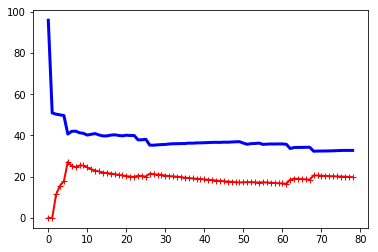

In [9]:
#学习曲线(即loss随迭代次数的变化曲线)
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):  # 训练集大小改变
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train_predict, y_train[:m]))
        val_errors.append(mean_squared_error(y_val_predict, y_val))
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
    
plot_learning_curves(lin_reg, X, y)

'''如果你的模型在训练集上是欠拟合的,添加更多的样本是没用的。你需要使用一个更复
杂的模型或者找到更好的特征。改善模型过拟合的一种方法是提供更多的训练数据,直到训练误差和验证误差相等。'''